# Quant Finance Modelling

### Valuating of an e-merchant loan portfolio.

**Background information on task:**

Today, credit is no longer limited to classical bank loans. The rise of e-commerce has increased the demand for new and more flexible credit solutions. The increased demand has been met by new companies from the fintech sector that offer easily accessible online loans to a wide audience. These new business models offer simple solutions, such as flexible payment schedules or buy-now-pay-later, that can be accessed with just a few clicks. 

Online merchants also need new ways to procure capital to manufacture their products, as they receive payment only after their product has been sold. In order to meet increasing demand, new credit offerings have emerged. Repayment of these loans is no longer based on a fixed schedule but instead depends directly on online sales. The loan is paid back in instalments with every sale, and thus payments depend directly on the sales volume. 

Predicting the future cash flows needed for the valuation of a portfolio consisting of these merchant loans is challenging. 

But you’re up for a challenge, right? 

Next stop: Zurich.

Our client is a large global online lending platform that provides loans to both consumers and merchants. These instruments are classified as assets on the balance sheet. 

Our audit colleagues have asked for our help to ensure the balance sheet values are correct. The value of the loan portfolio depends on future cash flows, which are stochastic. 

Our job is to ensure that the client’s portfolio has been valued correctly.

**Task**

You have time now. It’ll take us three hours to get there.

As part of the quantitative finance team, you and Jakob prepare a PowerPoint or Excel document containing the results of your portfolio valuation. If needed, provide your code in your slide deck to explain how you arrived at your solution.

As you are supporting the audit colleagues with the audit for the year 2020, the value of the portfolio shall be determined as of 31 December 2020. For the valuation, you are free to use a tool of your choice (e.g. R, Python, Excel). The following steps will guide you through the valuation:

1. Inspect the historical data provided by the client. The data ranges from June 2019 until December 2020. Every month constitutes a vintage and the data includes the loan amount that was originated per vintage, as well as the repayments that have been observed up until and including December 2020 (the vintages are given as rows and the columns specify the period of the repayment).
2. Based on the provided data, compute the historical repayment percentages, i.e. every repayment’s share of the origination amount.
3. Compute the expected repayment percentages for all vintages over the lifetime of the loans. Details on how the expected repayment percentages are to be computed can be found in the attached assumptions PDF below.
4. From the expected repayment percentages, compute the forecasted cash flows using the origination amounts.
5. Using the assumed discount rate, derive the present value of the forecasted cash flows and of the portfolio. Don’t forget to convert the annual interest rate to a monthly interest rate.
6. The client’s estimate of the portfolio value was CHF 84’993’122.67. How close is this to your own estimate? Compute both the absolute and relative difference. Jakob tells you that the audit team considers any difference smaller than CHF 500’000 to be acceptable given the size of the portfolio. Based on the result of your valuation, conclude whether the difference to the client’s estimate falls below his threshold. 
Jakob notes: The portfolio value should be rounded to two decimal places. The slides can be simple as we'll use them internally first. Focus on correct solutions to set up the team with the right insights. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'data.csv', adjust the file path accordingly
data = pd.read_csv('Data.csv', sep=';')

# Display the first few rows of the dataset
data.head(5)

,Unnamed: 0,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,...,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
1,30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,...,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
2,31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,...,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
3,31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,...,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
4,30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,...,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05


In [2]:
# Display the dimensions of the dataset (number of rows, number of columns)
data.shape

(20, 22)

In [3]:
# Show a summary of the dataset, including count, mean, standard deviation, etc.
data.describe()

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.993947e+07,7.215345e+04,2.362476e+05,2.938837e+05,3.368486e+05,4.494961e+05,4.959252e+05,5.647112e+05,6.151066e+05,6.492985e+05,...,7.575761e+05,8.305650e+05,8.533581e+05,9.565448e+05,1.005886e+06,9.749524e+05,1.044697e+06,9.591175e+05,1.078137e+06,1.057797e+06
std,6.563824e+06,3.226801e+05,7.923004e+05,7.770531e+05,7.767479e+05,1.014007e+06,1.014547e+06,1.143841e+06,1.159722e+06,1.214030e+06,...,1.457239e+06,1.517052e+06,1.573937e+06,1.811136e+06,2.054033e+06,1.860876e+06,1.959497e+06,1.672878e+06,2.055731e+06,1.978896e+06
min,1.001875e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144297e+04
25%,1.495705e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.784085e+04,6.717775e+04,8.318938e+04,6.918283e+04,1.222842e+05,1.186583e+05
50%,2.042265e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.859535e+05,2.287432e+05,2.226771e+05,2.619157e+05,3.234118e+05,2.956650e+05,3.389235e+05,3.414432e+05,3.407094e+05,4.033075e+05
75%,2.557838e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.841046e+05,6.243963e+05,6.793295e+05,7.152619e+05,7.556176e+05,...,8.053226e+05,8.362175e+05,8.416480e+05,9.116699e+05,9.665936e+05,9.852002e+05,1.030446e+06,9.565251e+05,1.003413e+06,9.841216e+05
max,3.048298e+07,1.443069e+06,3.332200e+06,3.011885e+06,2.953336e+06,4.082016e+06,3.930446e+06,4.682354e+06,4.637702e+06,4.947764e+06,...,6.142911e+06,6.228478e+06,6.476252e+06,7.636996e+06,8.983764e+06,8.030091e+06,8.374135e+06,7.065477e+06,8.752707e+06,8.383025e+06


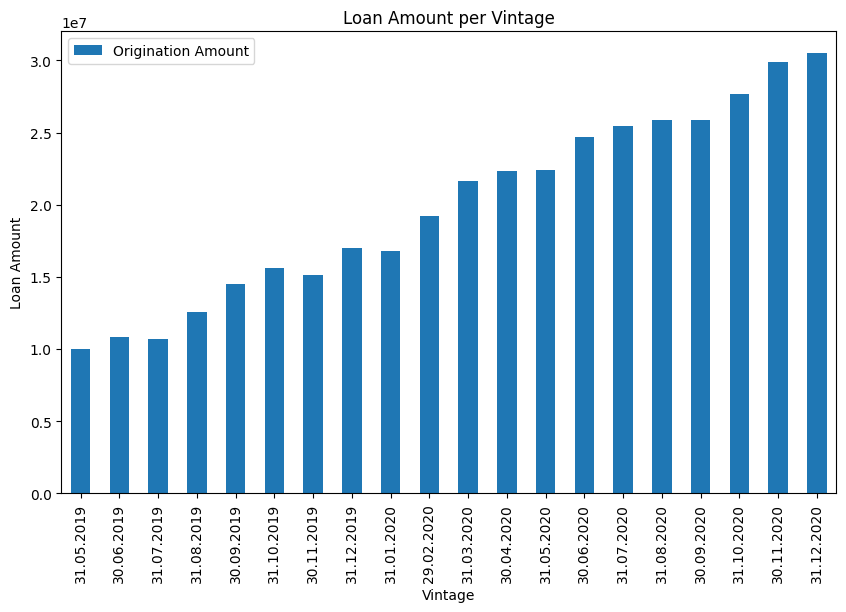

In [4]:
# Plotting loan amount per vintage
data.plot(x='Unnamed: 0', y='Origination Amount', kind='bar', figsize=(10, 6))
plt.xlabel('Vintage')
plt.ylabel('Loan Amount')
plt.title('Loan Amount per Vintage')
plt.show()

In [5]:
# Data Filtering and Selection
# Selecting a specific vintage
vintage_june_2019 = data[data['Unnamed: 0'] == '31.05.2019']
print(vintage_june_2019)

   Unnamed: 0  Origination Amount  31.05.2019  30.06.2019  31.07.2019  \
0  31.05.2019         10018746.17  1443069.08  3332200.33  1328138.75   

   31.08.2019  30.09.2019  31.10.2019  30.11.2019  31.12.2019  ...  \
0   928085.74   736418.27   539403.31   427557.86   324459.32  ...   

   31.03.2020  30.04.2020  31.05.2020  30.06.2020  31.07.2020  31.08.2020  \
0   116684.68    92699.67    63399.66    53265.12    37121.13     29787.1   

   30.09.2020  31.10.2020  30.11.2020  31.12.2020  
0     24524.9    18085.94    16581.01    11442.97  

[1 rows x 22 columns]


In [6]:
# Aggregation and Grouping
# Calculate the total loan amount per vintage
total_loan_amount_per_vintage = data.groupby('Unnamed: 0')['Origination Amount'].sum()
print(total_loan_amount_per_vintage)

Unnamed: 0
29.02.2020    19217205.82
30.04.2020    22334728.88
30.06.2019    10868379.04
30.06.2020    24671655.23
30.09.2019    14505071.44
30.09.2020    25887161.41
30.11.2019    15107713.30
30.11.2020    29872889.68
31.01.2020    16794379.95
31.03.2020    21628095.29
31.05.2019    10018746.17
31.05.2020    22393345.39
31.07.2019    10733932.61
31.07.2020    25478232.23
31.08.2019    12558727.02
31.08.2020    25878820.95
31.10.2019    15652952.20
31.10.2020    27699586.46
31.12.2019    17004745.04
31.12.2020    30482978.52
Name: Origination Amount, dtype: float64


In [7]:
# Calculate the repayment percentages for each repayment period
date_columns = data.columns[2:] 

# Iterate over the repayment period columns
for column in date_columns:
    repayment_percentage = (data[column] / data['Origination Amount']) * 100
    data[column + ' Percentage'] = repayment_percentage

# Display the updated dataset with repayment percentages
print(data.head())

   Unnamed: 0  Origination Amount  31.05.2019  30.06.2019  31.07.2019  \
0  31.05.2019         10018746.17  1443069.08  3332200.33  1328138.75   
1  30.06.2019         10868379.04        0.00  1392751.60  3011884.91   
2  31.07.2019         10733932.61        0.00        0.00  1537650.24   
3  31.08.2019         12558727.02        0.00        0.00        0.00   
4  30.09.2019         14505071.44        0.00        0.00        0.00   

   31.08.2019  30.09.2019  31.10.2019  30.11.2019  31.12.2019  ...  \
0   928085.74   736418.27   539403.31   427557.86   324459.32  ...   
1  1237868.70   970929.28   892351.83   668767.02   505612.59  ...   
2  2953335.55  1208316.08   879375.19   711016.84   658251.40  ...   
3  1617681.94  4082016.00  1387474.94  1247623.59   886293.35  ...   
4        0.00  1992242.84  3930445.60  1394620.78  1227905.58  ...   

   31.03.2020 Percentage  30.04.2020 Percentage  31.05.2020 Percentage  \
0               1.164664               0.925262               0.63

In [8]:
# Statistical Analysis
# Calculate the mean repayment amount
mean_repayment_amount = data[date_columns].mean().mean()
print("Mean Repayment Amount:", mean_repayment_amount)

Mean Repayment Amount: 695294.7507750001


In [9]:
# Calculate the present value of each cash flow
# Assumed annual discount rate (e.g., 5%)
discount_rate_annual = 0.05  
# Convert annual rate to monthly rate
discount_rate_monthly = (1 + discount_rate_annual) ** (1/12) - 1  

# Assuming the repayment period columns start from index 2
date_columns = data.columns[2:]  

# Iterate over the repayment period columns
for column in date_columns:
    present_value = data[column] / ((1 + discount_rate_monthly) ** (date_columns.get_loc(column) + 1))
    data[column + ' Present Value'] = present_value

# Calculate the present value of the portfolio
portfolio_present_value = data[date_columns + ' Present Value'].sum(axis=1)
data['Portfolio Present Value'] = portfolio_present_value

# Display the updated dataset with present values
print(data.head())

   Unnamed: 0  Origination Amount  31.05.2019  30.06.2019  31.07.2019  \
0  31.05.2019         10018746.17  1443069.08  3332200.33  1328138.75   
1  30.06.2019         10868379.04        0.00  1392751.60  3011884.91   
2  31.07.2019         10733932.61        0.00        0.00  1537650.24   
3  31.08.2019         12558727.02        0.00        0.00        0.00   
4  30.09.2019         14505071.44        0.00        0.00        0.00   

   31.08.2019  30.09.2019  31.10.2019  30.11.2019  31.12.2019  ...  \
0   928085.74   736418.27   539403.31   427557.86   324459.32  ...   
1  1237868.70   970929.28   892351.83   668767.02   505612.59  ...   
2  2953335.55  1208316.08   879375.19   711016.84   658251.40  ...   
3  1617681.94  4082016.00  1387474.94  1247623.59   886293.35  ...   
4        0.00  1992242.84  3930445.60  1394620.78  1227905.58  ...   

   30.04.2020 Percentage Present Value  31.05.2020 Percentage Present Value  \
0                             0.812381                       

In [10]:
# Assuming the portfolio present value column is named 'Portfolio Present Value' in the dataset
client_estimate = 84993122.67  # Client's estimate of the portfolio value

# Calculate the absolute difference
absolute_difference = abs(client_estimate - data['Portfolio Present Value'].iloc[-1])

# Calculate the relative difference
relative_difference = absolute_difference / client_estimate * 100

# Print the absolute and relative differences
print("Absolute Difference:", absolute_difference)
print("Relative Difference:", relative_difference)

Absolute Difference: 80960869.32944179
Relative Difference: 95.25578868749874
